CHIRAG SOOD    Assignment-9

In [1]:
import nltk
import string
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
import string
paragraph = """ My favourite topic is music. I listen a lot of music tracks  on Youtube . Arijit Singh is my favourite singer . The way of his singing really impresses me"""

In [6]:
lowerpunc = paragraph.lower().translate(str.maketrans('', '', string.punctuation))
lowerpunc

' my favourite topic is music i listen a lot of music tracks  on youtube  arijit singh is my favourite singer  the way of his singing really impresses me'

In [7]:
sentences = sent_tokenize(lowerpunc)
words = word_tokenize(lowerpunc)

print("Tokenized Sentences:\n", sentences)
print("\nTokenized Words:\n", words)

stwords = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stwords]

print("\nFiltered Words (Stopwords Removed):\n", filtered_words)

Tokenized Sentences:
 [' my favourite topic is music i listen a lot of music tracks  on youtube  arijit singh is my favourite singer  the way of his singing really impresses me']

Tokenized Words:
 ['my', 'favourite', 'topic', 'is', 'music', 'i', 'listen', 'a', 'lot', 'of', 'music', 'tracks', 'on', 'youtube', 'arijit', 'singh', 'is', 'my', 'favourite', 'singer', 'the', 'way', 'of', 'his', 'singing', 'really', 'impresses', 'me']

Filtered Words (Stopwords Removed):
 ['favourite', 'topic', 'music', 'listen', 'lot', 'music', 'tracks', 'youtube', 'arijit', 'singh', 'favourite', 'singer', 'way', 'singing', 'really', 'impresses']


In [8]:
fdist = FreqDist(filtered_words)
print("\nTop 10 Most Common Words:")
for word, freq in fdist.most_common(10):
    print(f"{word}: {freq}")


Top 10 Most Common Words:
favourite: 2
music: 2
topic: 1
listen: 1
lot: 1
tracks: 1
youtube: 1
arijit: 1
singh: 1
singer: 1


<Axes: title={'center': 'Top 10 Word Frequencies (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

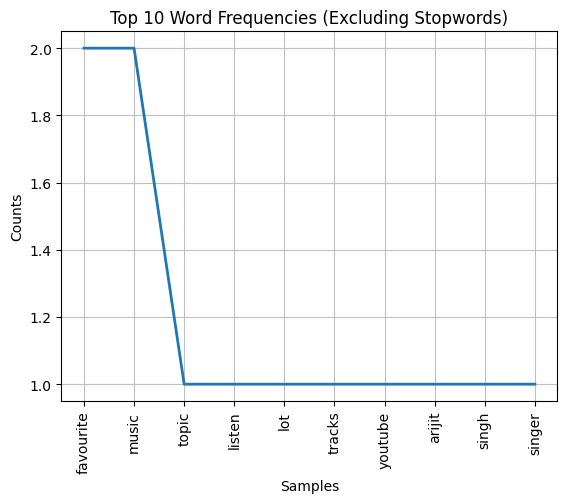

In [9]:
fdist.plot(10, title="Top 10 Word Frequencies (Excluding Stopwords)")

In [10]:

text = paragraph.lower().translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)
filtered_words = [word for word in words if word not in stopwords.words('english')]



porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [11]:

words5 = re.findall(r'\b[a-zA-Z]{6,}\b', paragraph)
print("Words with more than 5 letters:\n", words5)

Words with more than 5 letters:
 ['favourite', 'listen', 'tracks', 'Youtube', 'Arijit', 'favourite', 'singer', 'singing', 'really', 'impresses']


In [12]:
numbers = re.findall(r'\b\d+\b', paragraph)
print("\nNumbers in text:\n", numbers if numbers else "No numbers found.")


Numbers in text:
 No numbers found.


In [13]:

capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', paragraph)
print("\nCapitalized words:\n", capitalized_words)



Capitalized words:
 ['My', 'I', 'Youtube', 'Arijit', 'Singh', 'The']


In [14]:

alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)
print("\nAlphabetic words:\n", alphabetic_words)


Alphabetic words:
 ['My', 'favourite', 'topic', 'is', 'music', 'I', 'listen', 'a', 'lot', 'of', 'music', 'tracks', 'on', 'Youtube', 'Arijit', 'Singh', 'is', 'my', 'favourite', 'singer', 'The', 'way', 'of', 'his', 'singing', 'really', 'impresses', 'me']


In [15]:

vowel_words = re.findall(r'\b[aeiouAEIOU][a-zA-Z]*\b', paragraph)
print("\nWords starting with a vowel:\n", vowel_words)



Words starting with a vowel:
 ['is', 'I', 'a', 'of', 'on', 'Arijit', 'is', 'of', 'impresses']


In [16]:

def customtokenizer(text):
    pattern = r"""
        \b(?:\d+\.\d+|\d+)\b                    # Decimal or integer numbers
        | \b\w+(?:-\w+)*\b                      # Words, possibly hyphenated
        | \b\w+'\w+\b                           # Contractions like isn't, don't
    """
    tokens = re.findall(pattern, text, re.VERBOSE)
    return tokens

In [17]:
def cleantext(text):
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'(\+?\d{1,3}[\s-])?\d{3}[-\s]?\d{3}[-\s]?\d{4}', '', text)
    return text


In [18]:
cleanpara = cleantext(paragraph)
custtokens = customtokenizer(cleanpara)
print("Cleaned Text:\n", cleanpara)
print("\nCustom Tokens:\n", custtokens)

Cleaned Text:
  My favourite topic is music. I listen a lot of music tracks  on Youtube . Arijit Singh is my favourite singer . The way of his singing really impresses me

Custom Tokens:
 ['My', 'favourite', 'topic', 'is', 'music', 'I', 'listen', 'a', 'lot', 'of', 'music', 'tracks', 'on', 'Youtube', 'Arijit', 'Singh', 'is', 'my', 'favourite', 'singer', 'The', 'way', 'of', 'his', 'singing', 'really', 'impresses', 'me']
